# A Reasonable Introduction to Pandas

By [Allison Parrish](http://www.decontextualize.com/)

[Pandas](http://pandas.pydata.org/) is a Python library that helps you load, analyze and visualize data. It plays especially well with Jupyter Notebook, taking advantage of the notebook format to display data in easy-to-read ways. The data types that come with Pandas are kind of like super-charged lists and dictionaries, with built-in functionality for common tasks in statistics and data analysis that have the potential to run faster than their equivalents written with more familiar Python data types.

The purpose of this tutorial is to give you a taste for how Pandas works. By the end of the tutorial, you'll be able to use Pandas to load some data from a CSV file into a Pandas data frame and use Pandas' data visualization functions to draw a handful of simple graphs. The tutorial is aimed at people who know at least a little bit about how regular Python data types (like lists and dictionaries) work.

## Importing Pandas

To fully take advantage of the capabilities of Pandas, you need to import not just Pandas but a handful of other libraries:

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

The first line is what's known as an [IPython magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html); it tells the notebook server to display plots inline. The next three lines import Pandas (using the `as` clause to shorten its name to `pd`) and two other libraries, `numpy` and `matplotlib`, in case we need them. The final two lines set some options to make our plots look prettier.

Whenever you start a new notebook and want to use Pandas, it's a good idea to just copy and paste the code from that cell and make it the first cell in your own notebook.

Let's look at a couple of Pandas data types.

## The Series

The `Series` data type in Pandas is like a Python list, in that it stores a sequence of values. But it has a few extra goodies that make it appealing for data analysis.

One way to create a `Series` is to just pass a Python list to `pd.Series()`:

In [3]:
s = pd.Series([5, 5, 5, 10, 10, 12, 15, 15, 23, 27, 30])

In [4]:
s

0      5
1      5
2      5
3     10
4     10
5     12
6     15
7     15
8     23
9     27
10    30
dtype: int64

Unlike Python lists, you can operate on a Series using arithmetic operations. So, for example, you can multiply an entire Series by 0.5:

In [5]:
s * 0.5

0      2.5
1      2.5
2      2.5
3      5.0
4      5.0
5      6.0
6      7.5
7      7.5
8     11.5
9     13.5
10    15.0
dtype: float64

... or create a Series with 100 added to each entry from the original Series:

In [6]:
s + 100

0     105
1     105
2     105
3     110
4     110
5     112
6     115
7     115
8     123
9     127
10    130
dtype: int64

Series support a variety of statistical operations through methods. To get the smallest value in a Series:

In [7]:
s.min()

5

The greatest value:

In [8]:
s.max()

30

The arithmetic mean:

In [9]:
s.mean()

14.272727272727273

Various other operations are supported as well:

In [10]:
s.median()

12.0

In [11]:
s.mode()

0    5
dtype: int64

In [12]:
s.std() # standard deviation

8.866689450870703

In [13]:
s.quantile(0.75) # 75th percentile

19.0

The `.describe()` method gives you some quick insight on the statistical properties of the series as a whole:

In [14]:
s.describe()

count    11.000000
mean     14.272727
std       8.866689
min       5.000000
25%       7.500000
50%      12.000000
75%      19.000000
max      30.000000
dtype: float64

### Plotting Series

Every Series object has a `.plot()` method that will display a plot of the data contained in the series. Very easy!

<Axes: >

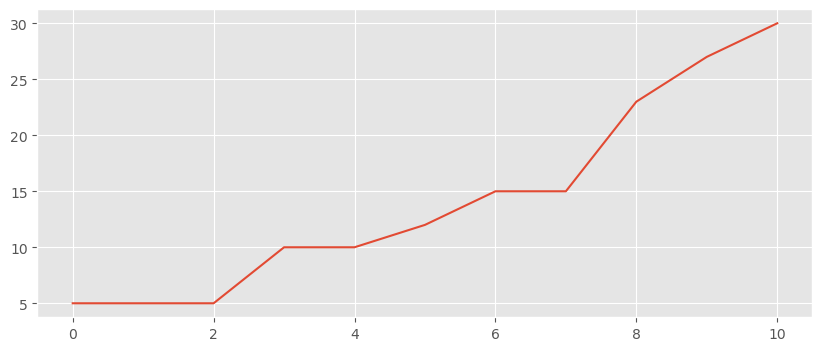

In [15]:
s.plot()

By default, you get a line plot, but the `.plot()` method can take a named parameter `kind` that allows you to specify different types of plots. [There's a full list here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html#pandas.Series.plot), but just to demonstrate, here's a bar graph from our test series:

<Axes: >

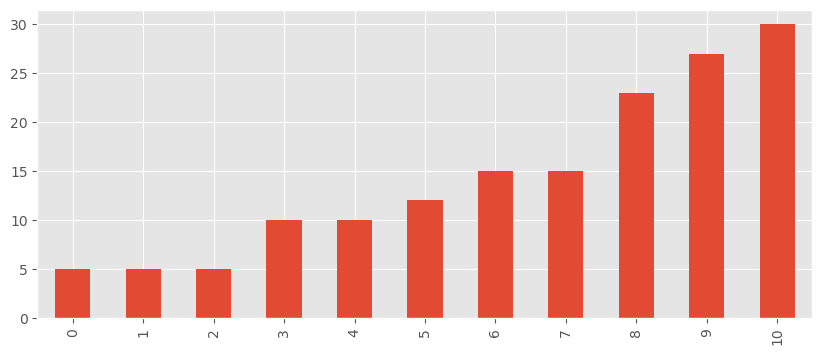

In [16]:
s.plot(kind="bar")

A horizontal bar chart:

<Axes: >

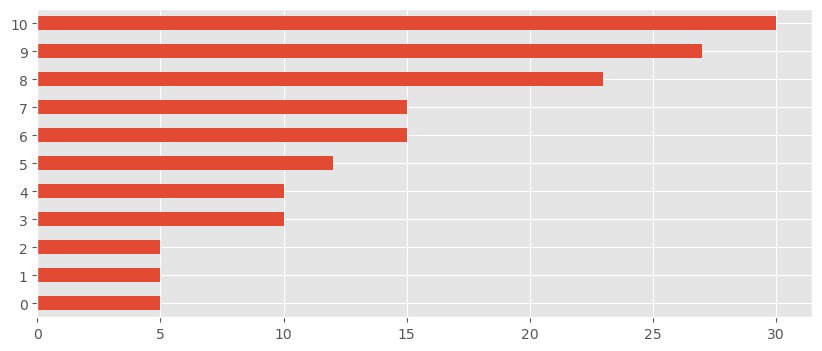

In [17]:
s.plot(kind="barh")

A pie chart:

<Axes: >

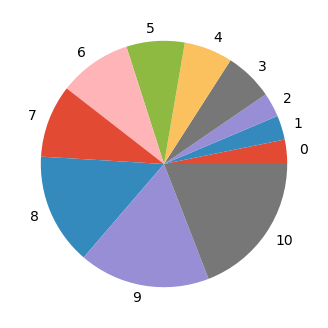

In [18]:
s.plot(kind="pie")

### Series indices don't have to be integers

The default behavior of a Series is to use integers as indices: if you initialize a Series with just a list, then the indices start at 0 and go up to the length of the list (minus 1). But the indices of a Series can be essentially any data type. You can specify the values and indices in a Series by passing them as a dictionary, or as two lists (values first, indices second):

In [24]:
planet_moons = pd.Series(
    [0, 0, 1, 2, 95, 146, 27, 14],
    ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'])

In [25]:
planet_moons

Mercury      0
Venus        0
Earth        1
Mars         2
Jupiter     95
Saturn     146
Uranus      27
Neptune     14
dtype: int64

All the various statistical operations still work, e.g.:

In [26]:
planet_moons.mean()

35.625

Plots work as well:

<Axes: >

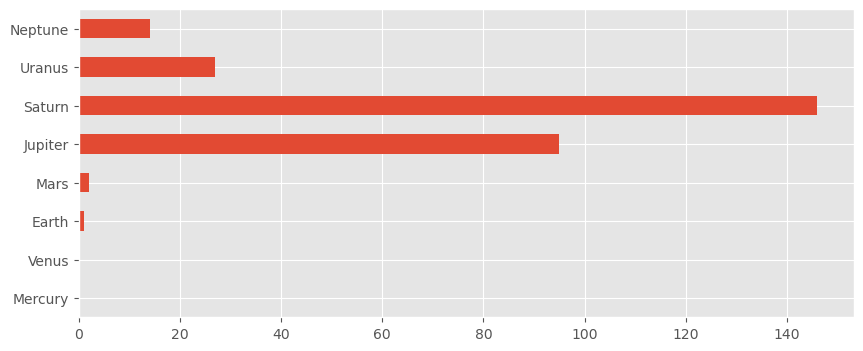

In [27]:
planet_moons.plot(kind="barh")

Even if indices are integers, they don't have to be *sequential* integers. A good example of this is what happens when you use the `.value_counts()` method, which returns a new Series with totals for each unique value (like a Counter object):

In [28]:
s_counts = s.value_counts()
s_counts

5     3
10    2
15    2
12    1
23    1
27    1
30    1
Name: count, dtype: int64

We'll get back to why this is important in a second...

### Series indexing

To get a particular value from a Series, you can use the square bracket syntax familiar to you from Python lists and dictionaries:

In [29]:
s[0]

5

In [30]:
s[4]

10

Using the slice operator gives you a new Series representing the corresponding slice:

In [31]:
s[1:4]

1     5
2     5
3    10
dtype: int64

This syntax works for Series with non-integer indices as well:

In [32]:
planet_moons["Neptune"]

14

Somewhat weirdly, you can use *slice* syntax with non-integer indices. This is something you can do with a Pandas Series that you *definitely* can't do with a regular list or dictionary:

In [34]:
planet_moons["Venus":"Jupiter"]

Venus       0
Earth       1
Mars        2
Jupiter    95
dtype: int64

Even with Series with non-integer indices will allow you to use numerical indices, to refer to the item in the series corresponding to that entry in numerical order:

In [35]:
planet_moons[5]

146

In [36]:
planet_moons[:4]

Mercury    0
Venus      0
Earth      1
Mars       2
dtype: int64

### Location versus index

Where this gets *even weirder* is with Series that have non-consecutive integer indices. Recall the result of `.value_counts()` for our original Series `s`:

In [37]:
s_counts

5     3
10    2
15    2
12    1
23    1
27    1
30    1
Name: count, dtype: int64

It's not clear what the expression `s[5]` should evaluate to: the item at numerical index `5` in the Series, or the value for the index `5`. Let's see what happens:

In [38]:
s_counts[5]

3

It looks like the Series gives us the value for the index `5` (i.e., not the value for the index `27`, which is in the fifth numerical index position). Weird! To avoid this ambiguity, you can use the `.iloc` attribute, which always uses numerical position:

In [39]:
s_counts.iloc[5]

1

### Selecting from a Series

Another way to get portions of a Series is to "select" items from it. Series values support an unusual syntax where you can put a *list* inside of the square bracket indexing syntax, and in that list you can specify which fields in particular you want. So for example:

In [40]:
planet_moons[ ["Jupiter", "Saturn"] ]

Jupiter     95
Saturn     146
dtype: int64

Very weird, right? But it's also quite handy in certain circumstances. You can also pass a list of Boolean values (i.e., `True` or `False`), in which case you'll receive a new Series that only has values for the items in the original series that correspond with a `True` value in the list. That's confusing to explain, but easy to understand if you see it in action:

In [41]:
planet_moons

Mercury      0
Venus        0
Earth        1
Mars         2
Jupiter     95
Saturn     146
Uranus      27
Neptune     14
dtype: int64

In [42]:
planet_moons[ [False, False, False, True, False, False, False, True] ]

Mars        2
Neptune    14
dtype: int64

This feature is of limited utility on its own, but there's another bit of functionality that the Series value gives you that works alongside it. The same way that you can multiply a Series, or add a constant to a Series, you can also use a relational operator on a Series. When you do so, you get back a Series that has `True` for every item that passed the test and `False` for every item that failed. For example:

In [43]:
planet_moons < 20

Mercury     True
Venus       True
Earth       True
Mars        True
Jupiter    False
Saturn     False
Uranus     False
Neptune     True
dtype: bool

If you combine these two features, you can write an expression that returns a Series with only those items that meet particular criteria. For example, the following expression gives us only those planets that have fewer than twenty known moons:

In [44]:
planet_moons[planet_moons < 20]

Mercury     0
Venus       0
Earth       1
Mars        2
Neptune    14
dtype: int64

## The Data Frame

I wanted to discuss the Series data type because you'll see it again and again when you're working with Pandas, and it's important to understand what it is and what it can do. But for the most part when you're working with Pandas, you'll be working with a data type called the `DataFrame`. A `DataFrame` is sort of like a spreadsheet, consisting of rows and columns. As with series, the rows and columns can have labels (i.e., the items have names like they do in the `planet_moons` Series above) and can also be indexed purely by position.

You can create a `DataFrame` by passing in a list of lists, where each list is a row of data.  Here I'm creating a very simple DataFrame for the [longest rivers in the world](https://en.wikipedia.org/wiki/List_of_rivers_by_length), including their names, their length (in kilometers), their drainage areas (in square kilometers) and their average discharge (in cubic meters per second):

In [45]:
river_data = [
    ['Amazon', 6992, 7050000, 209000],
    ['Nile', 6835, 3254555, 2800],
    ['Yangtze', 6300, 1800000,  31900],
    ['Mississippi', 6275, 2980000,  16200]
]
river_df = pd.DataFrame(river_data)

Evaluating the DataFrame in Jupyter Notebook displays the data in a nice, clean HTML table:

In [46]:
river_df

,0,1,2,3
0,Amazon,6992,7050000,209000
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900
3,Mississippi,6275,2980000,16200


When initializing a data frame with a list of lists like this (what the [Pandas documentation refers to as one form of "record"](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)), you'll notice that there are no column names. You need to provide these separately, with the `columns` parameter of the `DataFrame` constructor:

In [47]:
river_df = pd.DataFrame(river_data, columns=["Name", "Length", "Drainage area", "Discharge"])

And now voilà:

In [48]:
river_df

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900
3,Mississippi,6275,2980000,16200


You can also initialize a data frame by passing in a dictionary, whose keys are the column labels and the values are lists of individual values for each row:

In [49]:
river_data = {
    "Name": ["Amazon", "Nile", "Yangtze", "Mississippi"],
    "Length": [6992, 6835, 6300, 6275],
    "Drainage area": [7050000, 3254555, 1800000, 2980000],
    "Discharge": [209000, 2800, 31900, 16200]
}
river_df = pd.DataFrame(river_data)

In [50]:
river_df

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900
3,Mississippi,6275,2980000,16200


> NOTE: Most of the time, you'll initialize a data frame with external data that you read from a file, using e.g. [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) or [read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html). But it's still helpful to know how to use Python literals to initialize a data frame!

Just as with a Series, you can plot the data in a DataFrame right away using the `.plot()` method. However, the resulting graph isn't very useful.

<Axes: >

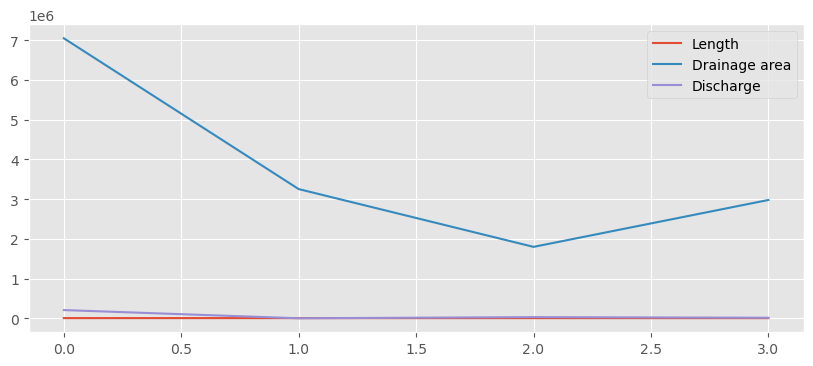

In [51]:
river_df.plot()

That graph doesn't make any sense, and it doesn't make sense for several different reasons:

* The values that we're plotting don't share a common *scale*, so the Y-axis doesn't really tell us anything useful about the Length and Discharge fields, whose scale is dwarfed by the Drainage area field.
* The X-axis ranges from zero to three. This would make sense if we were working with a time series (i.e., a data set with a number of data points recording the same phenomenon over time), but the data we're working with in this example has distinct values that aren't "ordered" in a meaningful sense.

To fix this, we can pass a couple of parameters to the `.plot()` method. For example:

* You can specify individual columns to plot with the `y` named parameter
* You can specify a label to use on the X-axis with the `x` named parameter

Combining these, we can get a nice bar chart of our rivers' discharges, showing that the amount of water but out by the Amazon is truly tremendous:

<Axes: xlabel='Name'>

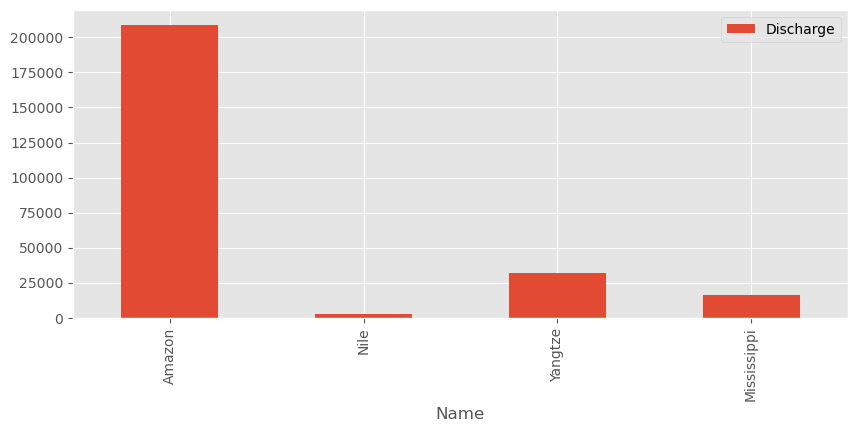

In [52]:
river_df.plot(kind="bar", x="Name", y="Discharge")

### Indexing the DataFrame

When you're working with DataFrames, sometimes you want to *isolate* an individual row or column as a series. In other cases, you want to *construct a new DataFrame* based on a subset of rows or columns from the original DataFrame. Or, you might just want to get a single value at the intersection of a row and column. In other words, there are three different operations, which we can think about in terms of the types involved:

* `DataFrame` → `Series` (i.e., get a column or row)
* `DataFrame` → `DataFrame` (i.e., filter a DataFrame based on rows or columns that meet particular criteria)
* `DataFrame` → single value (i.e., get a number, string, etc. from a particular row/column intersection)

We'll talk about these one by one below.

#### Getting rows and columns as Series objects

Getting a Series from a column of a DataFrame is easy: just use the label of the column in square brackets after the DataFrame:

In [53]:
river_df["Length"]

0    6992
1    6835
2    6300
3    6275
Name: Length, dtype: int64

With the resulting series, you can do any of the statistical operations discussed earlier for Series:

In [54]:
river_df["Length"].max()

6992

You can even plot the series, though it's not terribly useful because we're missing the names of the rivers:

<Axes: >

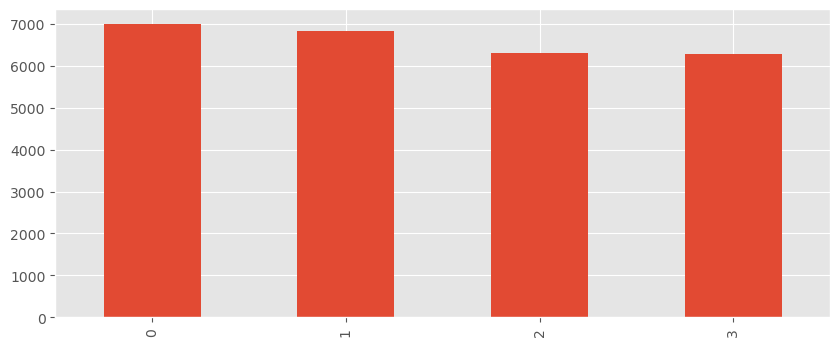

In [55]:
river_df["Length"].plot(kind="bar")

Getting an individual row as a series is also possible. Just use the `.iloc[]` attribute with the numerical index of the row inside the brackets:

In [56]:
river_df.iloc[2]

Name             Yangtze
Length              6300
Drainage area    1800000
Discharge          31900
Name: 2, dtype: object

#### Making new DataFrames from existing DataFrames

You can use the indexing syntax to give you a *new* DataFrame that includes only particular columns and rows from the original DataFrame. If you wanted a new DataFrame that only includes particular columns, then pass a *list* of the columns you want inside the square bracket indexing syntax:

In [57]:
name_length_df = river_df[["Name", "Length"]]

In [58]:
type(name_length_df)

pandas.core.frame.DataFrame

In [59]:
name_length_df

,Name,Length
0,Amazon,6992
1,Nile,6835
2,Yangtze,6300
3,Mississippi,6275


Weirdly, you can use this syntax to get a new DataFrame with just a single column, which is *different* from a Series object:

In [60]:
river_df[["Name"]]

,Name
0,Amazon
1,Nile
2,Yangtze
3,Mississippi


In [61]:
river_df["Name"]

0         Amazon
1           Nile
2        Yangtze
3    Mississippi
Name: Name, dtype: object

To get a new DataFrame with just a subset of rows from the original DataFrame, you can use slice syntax with either row labels or numbers. So to get rows 2 through 4:

In [62]:
a_few_rivers_df = river_df[1:3]

In [63]:
type(a_few_rivers_df)

pandas.core.frame.DataFrame

In [64]:
a_few_rivers_df

,Name,Length,Drainage area,Discharge
1,Nile,6835,3254555,2800
2,Yangtze,6300,1800000,31900


#### Selecting rows with Boolean operators

Just as with Series values, you can use a list of Boolean (i.e., `True` or `False`) values to select particular rows from a DataFrame:

In [65]:
river_df[ [True, False, False, True] ]

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
3,Mississippi,6275,2980000,16200


You can get a list of Boolean values for any column of a DataFrame (as a Series) using the the square brackets to get the column and then a comparison operator:

In [66]:
river_df["Discharge"] > 30000

0     True
1    False
2     True
3    False
Name: Discharge, dtype: bool

Combine the two, and you can write an expression that creates a new DataFrame with only the rows from the original DataFrame that match a particular criterion:

In [67]:
river_df[river_df["Discharge"] > 30000]

,Name,Length,Drainage area,Discharge
0,Amazon,6992,7050000,209000
2,Yangtze,6300,1800000,31900


## Working with real data

Okay, enough playtime, let's work with some real data! Let's load up this [Beijing PM2.5 data set](https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data). [Download the CSV file using this link](https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv) and save it in the same folder as your Jupyter Notebook. The data describes several years of hourly weather and pollution readings in Beijing. The people who produced the data also wrote a paper on it:

> [Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.](http://www.stat-center.pku.edu.cn/Stat/Uploads/Files/[20160114_1120]Beijing%20Air-Quality%20Assessment%20Report.pdf).
    
The paper has some technical content, but overall it's very readable and giving it a skim will help you understand the data a bit better.

Pandas makes it *very* easy to use data in CSV format. Just use the `read_csv()` function and pass it the filename of your data:

In [68]:
df = pd.read_csv("./PRSA_data_2010.1.1-2014.12.31.csv")

Pands supports a wide variety of input file formats, and can also export to many different file formats. The [IO tools page](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) in the Pandas User Guide has more information.

When reading data from a CSV file, Pandas generally does a good job of guessing the correct data types for the values. Sometimes Pandas will get it wrong, however. We'll discuss some strategies for dealing with this below, or you can consult [the documentation for the `.read_csv()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv) which outlines some tweaks that you can make with various parameters.

Let's take a look at the DataFrame we ended up with:

In [69]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


You can see that because there are so many rows in this DataFrame (43,824!), Pandas shows only a subset. But it's enough for us to get an idea of what the DataFrame looks like.

The `.info()` method shows us the rows and their data types:

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


The `int64`, `float64`, etc. data types are specific to Pandas, and are not the same thing as their regular Python equivalent. (Actually, they're specific to [Numpy](http://www.numpy.org/), but that's a different story.)

Of course, Pandas can't tell us what the data in these columns *mean*. For that, we need to consult the documentation that accompanies the data. Copying and pasting from the web page linked to above, here are the meanings for each field:

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* pm2.5: PM2.5 concentration (ug/m^3)
* DEWP: Dew Point (deg C)
* TEMP: Temperature (deg C)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* Is: Cumulated hours of snow
* Ir: Cumulated hours of rain

> Note that these aren't *universal* names for these fields. You can't expect to download a different data set from another set of researchers that records similar phenomena and expect that file to use (e.g.) `TEMP` as the column name for temperature.

As with Series in general, we can grab one of these columns and use `.describe()` to get a general overview of what data it contains:

In [71]:
df["pm2.5"].describe()

count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64

This tells us, e.g., that the "average" level of PM2.5 concentration in Beijing over the four-year period of the data was 98.6, with half of days being over 72 and half under. The highest PM2.5 recorded in the data was 994.

Looking at the plot for the `pm2.5` column, you can kind of make out yearly cycles in PM2.5 concentration:

<Axes: >

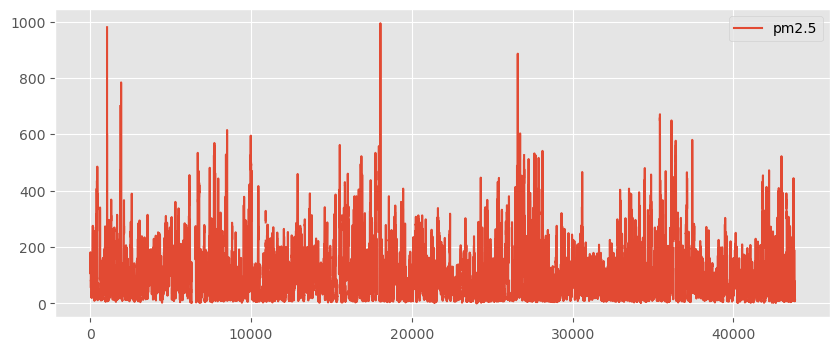

In [72]:
df.plot(y="pm2.5")

We can do the same analysis with the other fields. For example, here's a plot of temperature readings for each hour:

<Axes: >

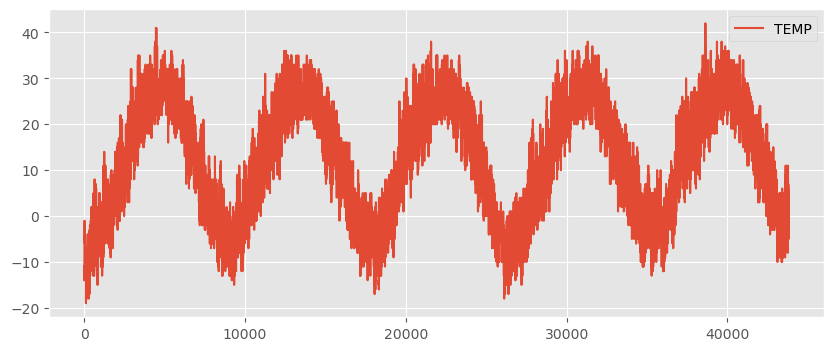

In [73]:
df.plot(y="TEMP")

Plotting these two together shows an interesting pattern, maybe:

<Axes: >

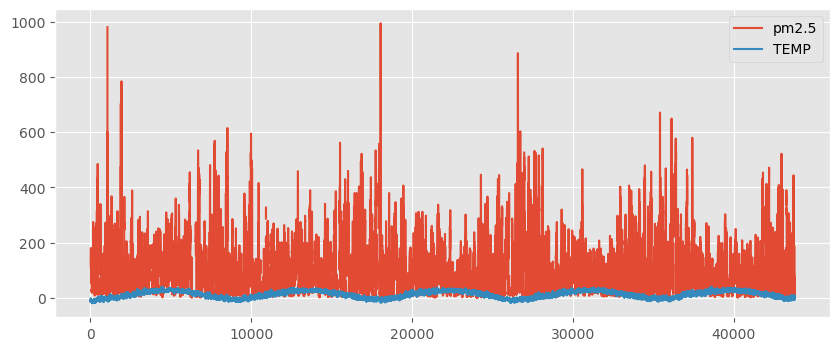

In [74]:
df.plot(y=["pm2.5", "TEMP"])

It looks like when temperature dips, pm2.5 spikes! (There are various statistical ways to confirm this suspicion, but for now we're going to stick with drawing the graphs.)

### Histograms

A histogram is a kind of plot that helps you understand how data are *distributed*. Understanding distribution helps you better reason about how often particular values are found in your data, and helps you easily formulate hypotheses about the phenomena your data is tracking. Let's look at a histogram of temperature data in our Beijing data set, using the `hist` plot kind:

<Axes: ylabel='Frequency'>

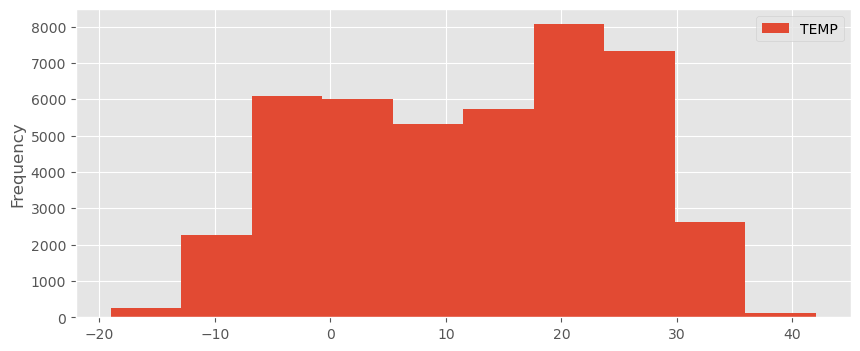

In [75]:
df.plot(kind="hist", y="TEMP")

Each bar in this graph corresponds to a "bin" of values surrounding the value on the X axis. When drawing a histogram, Pandas looks at each item in the data and puts it in the bin corresponding to the closest value. So for example, the graph above tells us that there are a lot of temperature readings (~8000) around 20 degrees C, but very few (less than 300) readings around 40 degrees C. You can increase the "resolution" of the histogram by providing a `bins` named parameter:

<Axes: ylabel='Frequency'>

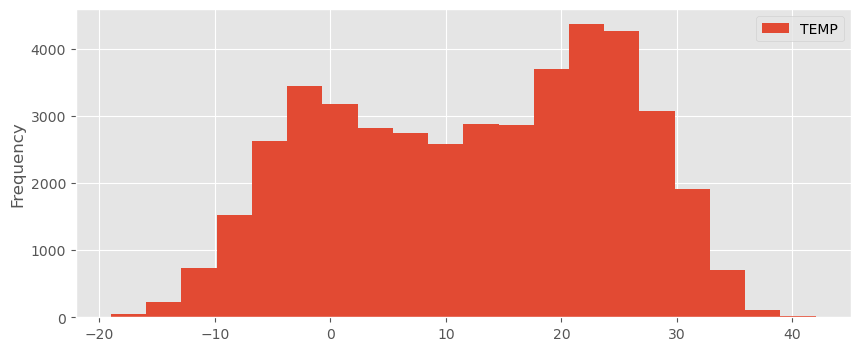

In [76]:
df.plot(kind="hist", y="TEMP", bins=20)

From this graph, we might hypothesize that a way to characterize Beijing temperatures is that they mostly cluster in either the 20—30 degrees C range, or the -5 to +5 degrees C range. Temperatures above 40 degrees C or below -20 degrees C are rare. The histogram for temperatures looks very different from the histogram for PM2.5:

<Axes: ylabel='Frequency'>

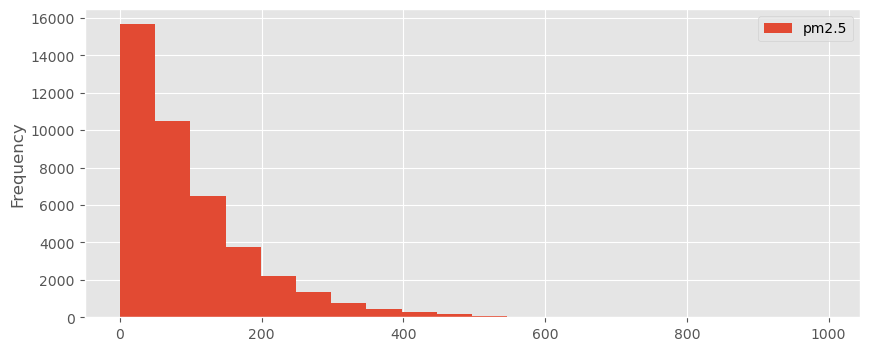

In [77]:
df.plot(kind="hist", y="pm2.5", bins=20)

This histogram shows that while there are a number of outliers, by far most of the PM2.5 readings are in the 0–200 range.

### Scatter plots

A scatter plot is an easy way to confirm your suspicion that two columns in your data set are somehow related. In a scatter plot, you select two columns, and every row in the data set becomes a point in a two-dimensional space, based on the value of those two columns in the row. You need to specify both columns using the `x` and `y` named parameters. So, for example, here's a scatter plot with temperature and dew point:

<Axes: xlabel='DEWP', ylabel='TEMP'>

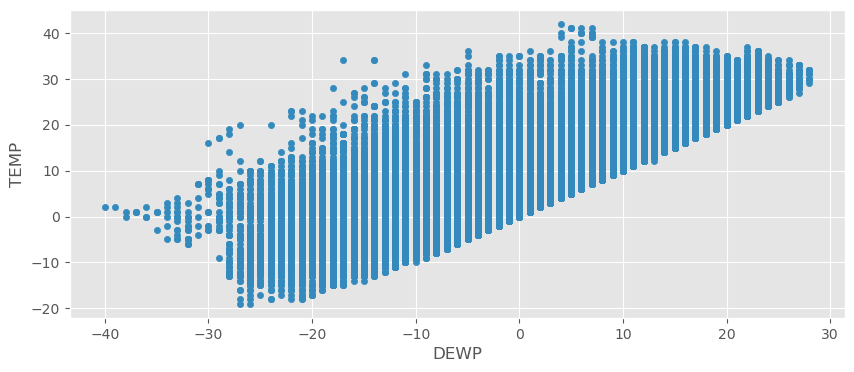

In [78]:
df.plot(kind="scatter", x="DEWP", y="TEMP")

Each dot in this scatterplot represents a row from the DataFrame. (Sometimes these dots are so dense that they appear to form solid masses or lines.) This scatter plot shows that as the temperature rises, so does the dew point ([as you might expect from the definition of dew point](https://en.wikipedia.org/wiki/Dew_point)). One way to talk about this relationship is to say that the values in these two columns are *correlated*.

However, drawing a scatter plot of PM2.5 concentration with the cumulative wind speed shows an inverse relationship:

<Axes: xlabel='pm2.5', ylabel='Iws'>

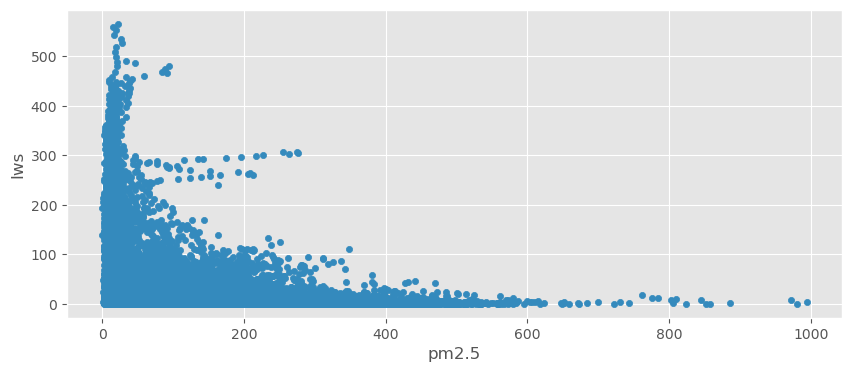

In [79]:
df.plot(kind="scatter", x="pm2.5", y="Iws")

You might interpret this graph as an indication that in general, as the wind speed goes up, the PM2.5 concentration falls. (This is intuitively true, and the authors of the paper go into a bit more detail about this effect in particular.) A scatter plot of PM2.5 and dew point also shows a correlation:

<Axes: xlabel='DEWP', ylabel='pm2.5'>

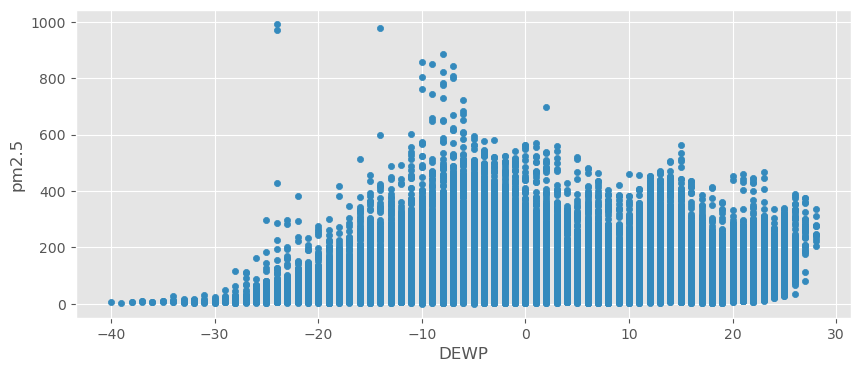

In [80]:
df.plot(kind="scatter", x="DEWP", y="pm2.5")

Again, this is a Pandas tutorial, not a statistics tutorial, so take these characterizations with a grain of salt. My goal here is to show you how histograms and scatter plots are good starting points for getting a "feel" for your data and how the variables might be related.

### Answering questions with selection

Let's say we wanted to find out how many readings in the data had a PM2.5 concentration of greater than 500. One easy way to do this is to use Boolean indexing, as discussed above. The following expression gives us a Boolean Series, with True values for every row with a PM2.5 greater than 400:

In [81]:
df["pm2.5"] > 400

0        False
1        False
2        False
3        False
4        False
         ...  
43819    False
43820    False
43821    False
43822    False
43823    False
Name: pm2.5, Length: 43824, dtype: bool

And then we can use that to subscript the DataFrame, giving us a new DataFrame with only the rows where the condition obtains:

In [82]:
df[df["pm2.5"] > 400]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
412,413,2010,1,18,4,407.0,-13,-11.0,1028.0,NW,7.60,0,0
427,428,2010,1,18,19,408.0,-7,-3.0,1025.0,SE,0.89,0,0
428,429,2010,1,18,20,435.0,-5,-2.0,1026.0,cv,0.89,0,0
429,430,2010,1,18,21,403.0,-5,-1.0,1026.0,NW,1.79,0,0
431,432,2010,1,18,23,402.0,-6,-1.0,1026.0,cv,0.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42982,42983,2014,11,26,22,502.0,1,2.0,1020.0,cv,1.34,0,0
42983,42984,2014,11,26,23,522.0,1,2.0,1020.0,cv,2.23,0,0
42984,42985,2014,11,27,0,470.0,1,2.0,1021.0,cv,3.12,0,0
42985,42986,2014,11,27,1,439.0,0,2.0,1022.0,NW,3.13,0,0


Pandas tells us that there are 545 such rows. Neat! You can continue to use this long indexing expression with two references to `df`, but I often find it helpful to make a new variable that refers to the subscripted dataframe, e.g.:

In [83]:
pm400_df = df[df["pm2.5"] > 400]

With this limited DataFrame, we can still draw plots! So, for example, if we wanted to see a temperature histogram just for these days:

<Axes: ylabel='Frequency'>

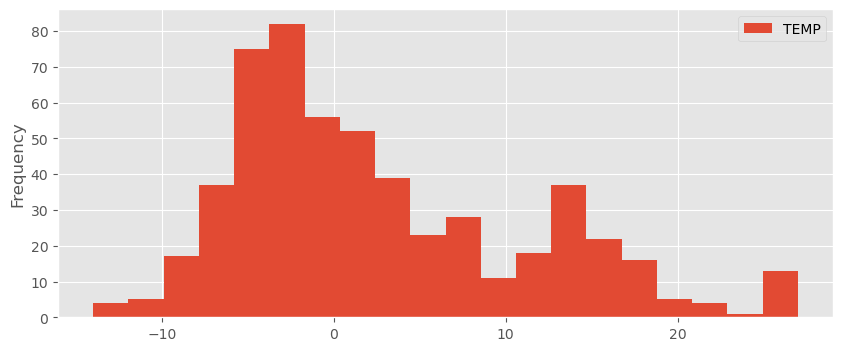

In [84]:
pm400_df.plot(kind="hist", y="TEMP", bins=20)

Comparing this distribution to the rows where PM2.5 is less than 400:

<Axes: ylabel='Frequency'>

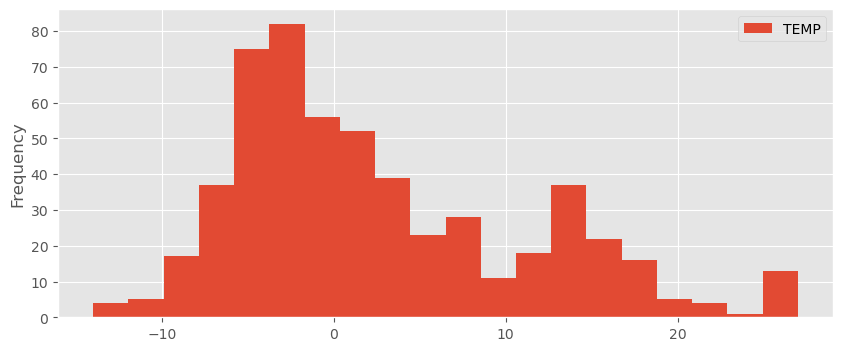

In [85]:
pm400_df.plot(kind="hist", y="TEMP", bins=20)

You can see that the two distributions are quite different, with the temperatures on days with high PM2.5 concentrations being lower on average.

### Value counts and bar charts

The `cbwd` indicates the prevailing wind direction, which the researchers have narrowed down to four distinct values: NE (northeast), NW (northwest), SE (southeast) and "cv" ("calm or variable"). They outline the reasons for recording the data this way in their paper. The values in this column, unlike the values in the other columns, consist of a discrete set, rather than continuous numbers. As such, Pandas will be confused if we ask for a plot:

In [86]:
df["cbwd"].plot()

TypeError: no numeric data to plot

The "no numeric data to plot" error is Pandas saying, "hey you wanted me to draw a graph, but there are no numbers in this field, what gives." Probably the best way to visualize discrete values is by *counting them* and then drawing a bar graph. As discussed earlier, the `.value_counts()` method returns a Series that counts how many times each value occurs in a column:

In [87]:
df["cbwd"].value_counts()

cbwd
SE    15290
NW    14150
cv     9387
NE     4997
Name: count, dtype: int64

Plotting this data as a bar chart shows us how many times each of these discrete values were recorded:

<Axes: ylabel='cbwd'>

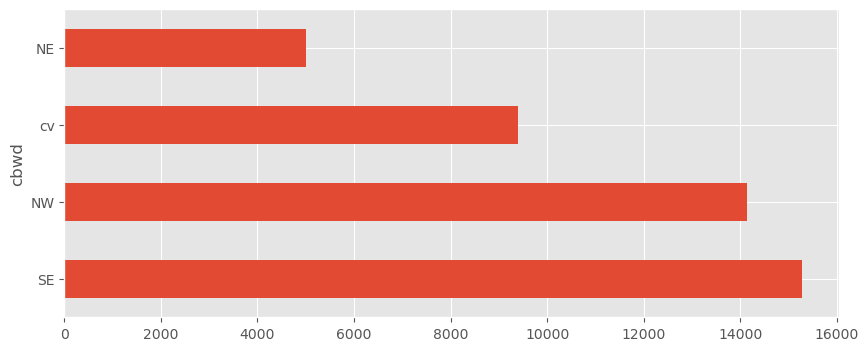

In [88]:
df["cbwd"].value_counts().plot(kind="barh")

## Sorting

You can sort a data frame by a particular column with the [`.sort_values()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values). This evaluates to a new data frame where the rows are ordered by the columns you select with the `by` parameter. For example, the following expression sorts our air quality data frame by the `pm2.5` column. By default, Pandas sorts in ascending order; we can override this with the `ascending` parameter:

In [89]:
sorted_df = df.sort_values(by=["pm2.5"], ascending=False)

If you look at the first few rows, you can see that the days with the most pm2.5 pollution are at the top:

In [90]:
sorted_df[:10]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
18049,18050,2012,1,23,1,994.0,-24,-12.0,1032.0,NW,4.92,0,0
1057,1058,2010,2,14,1,980.0,-14,-7.0,1029.0,cv,0.89,0,0
18050,18051,2012,1,23,2,972.0,-24,-12.0,1032.0,NW,8.05,0,0
26588,26589,2013,1,12,20,886.0,-8,-7.0,1023.0,cv,1.34,0,0
26590,26591,2013,1,12,22,858.0,-10,-9.0,1024.0,cv,0.89,0,0
26589,26590,2013,1,12,21,852.0,-9,-8.0,1023.0,NE,0.89,0,0
26584,26585,2013,1,12,16,845.0,-7,-2.0,1021.0,SE,8.95,0,0
26587,26588,2013,1,12,19,824.0,-8,-7.0,1022.0,cv,0.89,0,0
26585,26586,2013,1,12,17,810.0,-7,-4.0,1021.0,SE,9.84,0,0
26591,26592,2013,1,12,23,805.0,-10,-9.0,1024.0,NW,1.79,0,0


This data frame is like any other data frame, in that we can plot it etc.:

<Axes: >

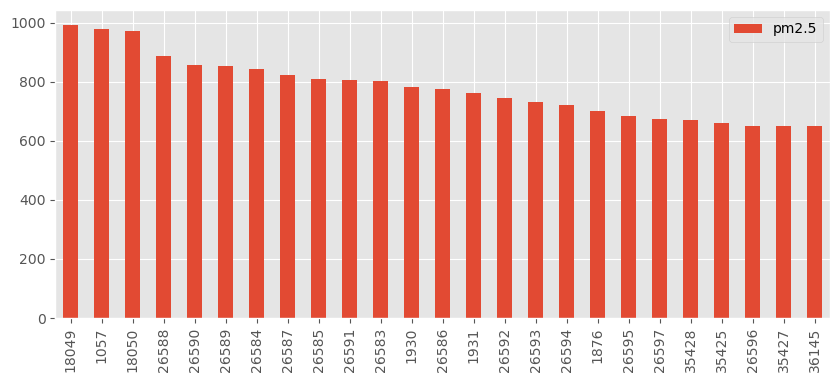

In [91]:
sorted_df[:25].plot(kind="bar", y="pm2.5")

## Grouping

It's often the case that we want to compare some combination of subsets of our data, based on some common column value. For example, in the Beijing particulate data, we might want to compare pm2.5 between months, or hours of the day, or even wind direction. We can already sort of do this by hand by filtering the data frame, e.g., I can compare January with February by creating separate data frames...

In [92]:
january_df = df[df['month'] == 1]
february_df = df[df['month'] == 2]

... and then grabbing some information from them separately:

In [93]:
january_df["pm2.5"].mean()

115.05906078939786

In [94]:
february_df["pm2.5"].mean()

125.73613993477616

But this is a little inconvenient—we'd have to type out every month, or loop over them and create separate data frames. It would be even more inconvenient if the data we're grouping on has hundreds (or thousands) of discrete values, or if we don't know what those values will be ahead of time. To ease this situation, Pandas provides a `.groupby()` method, which groups a data frame by distinct values in the column that you specify. The following expression returns a special Pandas data type called a [`GroupBy`](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html), which doesn't do much on its own:

In [95]:
df.groupby("month")

... but has a number of methods that give us meaningful information about the grouped data. Usually, you'll want to apply an aggregation of some sort to the group—i.e., perform some statistical function on the data in each group. For example, let's call `.mean()` on this `GroupBy` value and assign it to a variable:

In [96]:
mean_by_month_df = df.groupby("month").mean(numeric_only=True)

In [97]:
mean_by_month_df

,No,year,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
month,,,,,,,,,,,
1,17902.1,2012.0,16.000000,11.5,115.059061,-16.035484,-4.553226,1028.830376,36.248516,0.204301,0.004032
2,18612.5,2012.0,14.602837,11.5,125.736140,-12.941489,-1.569149,1025.862145,18.074938,0.248227,0.002069
3,19322.9,2012.0,16.000000,11.5,97.757593,-8.890591,6.080914,1020.742204,26.959089,0.088978,0.078226
4,20054.9,2012.0,15.500000,11.5,83.709251,-1.495278,13.995833,1014.254722,33.642358,0.000000,0.151944
5,20786.9,2012.0,16.000000,11.5,80.113051,7.227688,21.302151,1008.227957,27.093737,0.000000,0.231452
6,21518.9,2012.0,15.500000,11.5,96.513656,16.112778,24.586389,1005.216944,11.326483,0.000000,0.230278
7,22250.9,2012.0,16.000000,11.5,94.332328,20.574194,27.197312,1002.993280,13.733753,0.000000,0.507258
8,22994.9,2012.0,16.000000,11.5,79.996704,19.271237,25.823118,1007.352419,12.104952,0.000000,0.256183
9,23726.9,2012.0,15.500000,11.5,85.209421,12.886389,20.032778,1014.695000,11.080028,0.000000,0.516389


This gives us a new data frame whose rows are each individual month, and whose columns are the mean of all rows in the original data frame that have that value in the month column. (The `numeric_only=True` parameter ensures that we're only getting the mean for numeric values—otherwise, Pandas would try to find the average of the strings that indicate wind direction, which doesn't make sense and results in an error.)

### Filtering groups

The data frame that we get in this way is just like any other data frame! We can filter it, to find only the months whose aggregated data meets particular criteria, like months where there is some amount of snow:

In [98]:
mean_by_month_df[mean_by_month_df["Is"] > 0]

,No,year,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
month,,,,,,,,,,,
1,17902.1,2012.0,16.000000,11.5,115.059061,-16.035484,-4.553226,1028.830376,36.248516,0.204301,0.004032
2,18612.5,2012.0,14.602837,11.5,125.736140,-12.941489,-1.569149,1025.862145,18.074938,0.248227,0.002069
3,19322.9,2012.0,16.000000,11.5,97.757593,-8.890591,6.080914,1020.742204,26.959089,0.088978,0.078226
11,25190.9,2012.0,15.500000,11.5,105.762639,-6.058889,4.964444,1022.681250,38.114533,0.001111,0.196667
12,25922.9,2012.0,16.000000,11.5,98.200226,-14.768548,-2.297581,1026.692742,44.100500,0.101075,0.001882


Or sort it by some column:

In [99]:
mean_by_month_df.sort_values(by=["Iws"]) # months from least windy to most windy

,No,year,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
month,,,,,,,,,,,
9,23726.9,2012.0,15.500000,11.5,85.209421,12.886389,20.032778,1014.695000,11.080028,0.000000,0.516389
6,21518.9,2012.0,15.500000,11.5,96.513656,16.112778,24.586389,1005.216944,11.326483,0.000000,0.230278
8,22994.9,2012.0,16.000000,11.5,79.996704,19.271237,25.823118,1007.352419,12.104952,0.000000,0.256183
10,24458.9,2012.0,16.000000,11.5,120.401509,5.049194,12.997849,1020.384677,13.620694,0.000000,0.155376
7,22250.9,2012.0,16.000000,11.5,94.332328,20.574194,27.197312,1002.993280,13.733753,0.000000,0.507258
2,18612.5,2012.0,14.602837,11.5,125.736140,-12.941489,-1.569149,1025.862145,18.074938,0.248227,0.002069
3,19322.9,2012.0,16.000000,11.5,97.757593,-8.890591,6.080914,1020.742204,26.959089,0.088978,0.078226
5,20786.9,2012.0,16.000000,11.5,80.113051,7.227688,21.302151,1008.227957,27.093737,0.000000,0.231452
4,20054.9,2012.0,15.500000,11.5,83.709251,-1.495278,13.995833,1014.254722,33.642358,0.000000,0.151944


### Plotting groups

We can also plot the values that result from the grouped aggregation, like so:

<Axes: xlabel='month'>

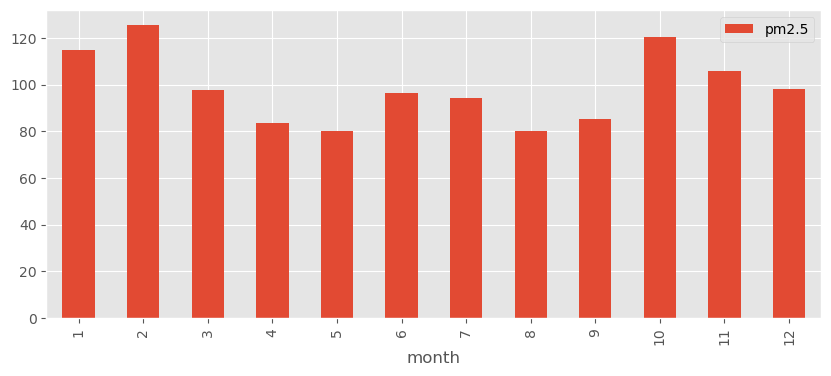

In [100]:
mean_by_month_df.plot(kind="bar", y=["pm2.5"])

Aggregated data is especially useful for plotting more than one value, which you can do by passing a list as the `y` parameter to the `.plot()` method:

<Axes: xlabel='month'>

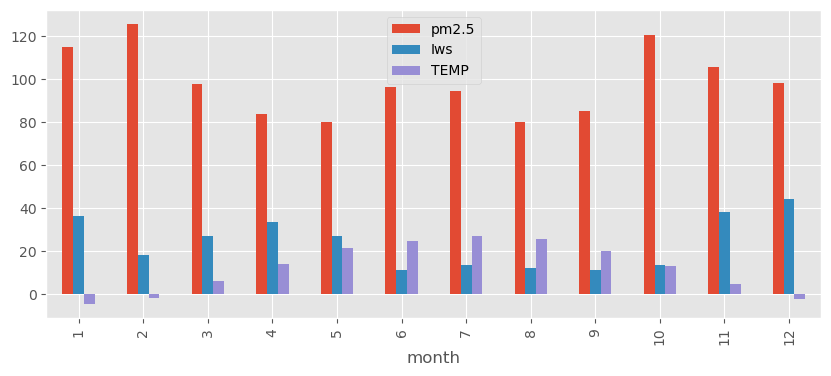

In [101]:
mean_by_month_df.plot(kind="bar", y=["pm2.5", "Iws", "TEMP"]) # plot pm2.5 and wind speed

### Other aggregations

The `.mean()` function is an especially useful aggregating groups, but it's not the only option available to you. Pandas has [a number of built-in aggregation methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#built-in-aggregation-methods), and a powerful mechanism for [making your own aggregations](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation-with-user-defined-functions). For example, let's group by wind direction and calculate the standard deviation for every column:

In [102]:
stdev_by_wind_df = df.groupby("cbwd").std()

In [103]:
stdev_by_wind_df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
cbwd,,,,,,,,,,,,
NE,12587.177661,1.403850,3.578595,8.856686,6.885869,95.196825,15.006811,12.112829,10.862661,14.774416,0.539438,2.019443
NW,12775.902308,1.403153,3.973173,8.898578,6.553798,89.064152,13.922256,11.616472,10.292673,77.679760,0.587812,1.700414
SE,12530.343497,1.420889,2.825076,8.690130,6.802265,80.050435,12.637011,11.071236,9.291557,21.643811,1.007954,0.955686
cv,12589.447902,1.411884,3.397928,8.789224,6.935419,100.402930,12.993651,11.520702,9.450225,5.020570,0.603692,1.145963


And then plot the values for the `pm2.5` column:

<Axes: xlabel='cbwd'>

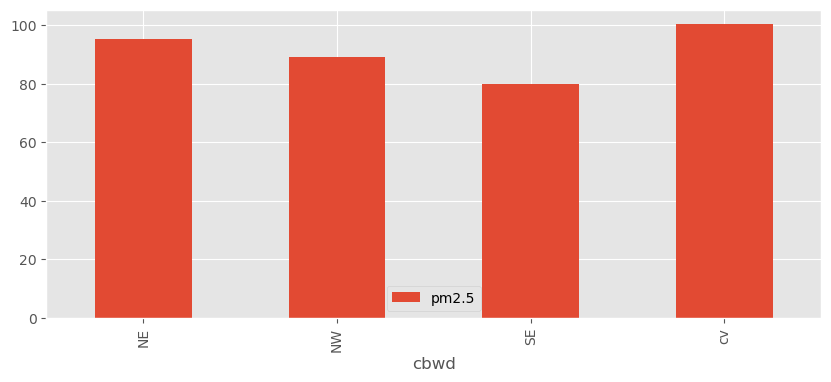

In [104]:
stdev_by_wind_df.plot(kind="bar", y=["pm2.5"])

This shows the (potentially?) interesting result that pm2.5 concentrations vary less when the wind is coming from the southeast.

## Working with columns

### Remove a column

Sometimes your data has more data than you need, and that ends up gumming up the works. It's easy to simply drop a column or two from your data frame to clean things up a bit. For example, let's say that we're simply not interested in precipitation data, and we'd prefer to not see it in our data set. The [`.drop()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop) lets us do just that. It evaluates to a copy of the data frame with the columns named in the list given for the `columns` parameter removed:

In [105]:
no_precip_df = df.drop(columns=["Ir", "Is"])

In [106]:
no_precip_df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97
...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72


### Add a new column

Sometimes you might want to add a new column to a table. You can do this with the `DataFrame`'s [`.assign()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign). The name of the parameter you pass to the function will become the column name, and the value for that parameter should be the values that you'd like to assign. Here's a simple (and sorta useless) example:

In [107]:
df.assign(all_ones=1)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,all_ones
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,1
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,1
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,1
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,1
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,1
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,1
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,1
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,1


This expression adds a new column `all_ones` that has the value `1` for every row. Equally useless but helpful for an example: we could create a list of random values that is the same length as the data frame, and use that as the data for the new column:

In [108]:
import random
random_vals = [random.randrange(0, 100) for i in range(len(df))]

In [109]:
df.assign(rand=random_vals)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,rand
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,63
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,30
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,47
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,38
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,52
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,94
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,77
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,73


(In the real world, you'd probably have some actual data that you wanted to add—perhaps data that you found from another source that happens to align with the existing data—not just a single static value or a list of random values.)

You can also add a new column that results from a *calculation* on existing values. This is a bit tricky, and uses a fact about `Series` objects that we discussed earlier, which is that you can perform a mathematical operation on *every item in a `Series`* using Python's normal math operators. For example, we could get the Fahrenheit equivalents of the `TEMP` column series like so:

In [110]:
df["TEMP"] * (9/5) + 32

0        12.2
1        10.4
2        12.2
3         6.8
4        10.4
         ... 
43819    28.4
43820    26.6
43821    26.6
43822    24.8
43823    26.6
Name: TEMP, Length: 43824, dtype: float64

If we use this expression as the parameter to `assign`, we can add this `Series` as a new column:

In [111]:
normal_temps_df = df.assign(temp_f=df["TEMP"] * (9/5) + 32)

The result:

In [112]:
normal_temps_df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,temp_f
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,12.2
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,10.4
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,12.2
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,6.8
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,28.4
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,26.6
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,26.6
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,24.8


We can verify that our new column is basically correct by calling the `.describe()` method on the column:

In [113]:
normal_temps_df["temp_f"].describe()

count    43824.000000
mean        54.407338
std         21.957503
min         -2.200000
25%         35.600000
50%         57.200000
75%         73.400000
max        107.600000
Name: temp_f, dtype: float64

A quick shorthand for adding a column to a data frame, modifying the original data frame, is to assign the desired value or expression to the key that you want to use as a column name, e.g.:

In [114]:
df["fahrenheit"] = df["TEMP"] * (9/5) + 32

In [115]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,fahrenheit
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,12.2
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,10.4
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,12.2
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,6.8
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,28.4
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,26.6
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,26.6
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,24.8


### Change a column's data type

The most common reason that you might want to convert a data type is when Pandas thinks something should be a number, but you actually want it to be a string, or Pandas thinks something should be a string but you actually want it to be a number. Let's say that we had the data below (in CSV format), which consists of the house numbers, street names, zip codes and admission prices of several well-known New York City museums:

In [116]:
museum_data = """\
Number,Street,Zip,Price
200,Central Park West,10024,$28
200,Eastern Parkway,11238,$20
1071,Fifth Avenue,10128,$30
1000,Fifth Avenue,10028,$25
11,West 53rd Street,10019,$25"""

We can read it into a `DataFrame` like so. (The stuff with `StringIO` in the cell below is a workaround to get the `.read_csv()` function to get its data from a string instead of from a file.)

In [119]:
from io import StringIO
museum_df = pd.read_csv(StringIO(museum_data))

In [120]:
museum_df

,Number,Street,Zip,Price
0,200,Central Park West,10024,$28
1,200,Eastern Parkway,11238,$20
2,1071,Fifth Avenue,10128,$30
3,1000,Fifth Avenue,10028,$25
4,11,West 53rd Street,10019,$25


The `.dtypes` attribute of the data frame tells us the data types of the columns. Pandas has guessed that the street number is an integer (fair enough, though [house numbers aren't necessarily numbers](https://www.mjt.me.uk/posts/falsehoods-programmers-believe-about-addresses/)), the street is an `object` (more on this below), the ZIP code is an integer, and the price is an `object`. When you see `object` in `.dtypes`, that usually means "string"(though it can mean other kinds of Python values, and in recent versions of Pandas there is an experimental [string type](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.StringDtype.html#pandas.StringDtype)).

In [121]:
museum_df.dtypes

Number     int64
Street    object
Zip        int64
Price     object
dtype: object

Ideally, we'd like to convert the ZIP code to a string, since a ZIP code isn't actually "numeric" in a useful way (e.g., it doesn't make sense to do arithmetic them, and there is a difference between a ZIP code like `07101`, which is a ZIP code in Newark, NJ, and `7101`, which is not a valid ZIP code at all). We'd also like to convert the price to some kind of number, since we *may* want to do math on those such as sorting by price, calculating sales tax, etc.

#### String to int

So let's do that. The `.astype()` method of a `Series` object evaluates to a copy of that series with its values converted to the corresponding type. So the following expression:

In [122]:
museum_df["Zip"].astype(str)

0    10024
1    11238
2    10128
3    10028
4    10019
Name: Zip, dtype: object

... evaluates to a copy of the `Zip` column converted to strings. We can now replace the original column with this series like so:

In [123]:
museum_df["Zip"] = museum_df["Zip"].astype(str)

In [124]:
museum_df.dtypes

Number     int64
Street    object
Zip       object
Price     object
dtype: object

#### Int to string

Okay! Converting the prices to numbers is a bit trickier. You might think we could run the following code, but you'll see that we get an error:

In [125]:
museum_df["Price"].astype(int)

ValueError: invalid literal for int() with base 10: '$28'

The error is telling us that Pandas can't convert the value to a number because it doesn't know what to do with that `$` character.

Instead, we need to massage the value a little bit, and *then* convert to a number. Pandas `Series` objects with string data have a special attribute `.str` that provides access to a number of string methods that let you perform transformations on the underlying string data. Just as an example, here's a `Series` with a bunch of strings:

In [126]:
text_series = pd.Series(["mother", "said", "there'd", "be", "days", "like", "these"])

In [127]:
text_series

0     mother
1       said
2    there'd
3         be
4       days
5       like
6      these
dtype: object

And the `.str` attribute of this has a number of methods that we can call, e.g.:

In [128]:
text_series.str.upper()

0     MOTHER
1       SAID
2    THERE'D
3         BE
4       DAYS
5       LIKE
6      THESE
dtype: object

In [129]:
text_series.str.replace("e", "3")

0     moth3r
1       said
2    th3r3'd
3         b3
4       days
5       lik3
6      th3s3
dtype: object

In [130]:
text_series.str.len()

0    6
1    4
2    7
3    2
4    4
5    4
6    5
dtype: int64

The [full list of supported string methods](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling) is in the Pandas documentation. Importantly, we can also *index* this `.str` attribute like any other string:

In [131]:
text_series.str[1:-1]

0     othe
1       ai
2    here'
3         
4       ay
5       ik
6      hes
dtype: object

Okay. Getting back to our museum example, we can use the `.str` attribute to grab everything *after* the dollar sign using string indexing:

In [132]:
museum_df["Price"].str[1:]

0    28
1    20
2    30
3    25
4    25
Name: Price, dtype: object

And then we can convert the resulting series to an integer using the `.astype()` method:

In [133]:
museum_df["Price"].str[1:].astype(int)

0    28
1    20
2    30
3    25
4    25
Name: Price, dtype: int64

And finally, we can overwrite the original column with this value:

In [134]:
museum_df["Price"] = museum_df["Price"].str[1:].astype(int)

And voilà!

In [135]:
museum_df.dtypes

Number     int64
Street    object
Zip       object
Price      int64
dtype: object

Here are our museums, sorted in reverse order by cost of admission:

In [136]:
museum_df.sort_values("Price", ascending=False)

,Number,Street,Zip,Price
2,1071,Fifth Avenue,10128,30
0,200,Central Park West,10024,28
3,1000,Fifth Avenue,10028,25
4,11,West 53rd Street,10019,25
1,200,Eastern Parkway,11238,20


### Working with dates and times

TK.

## Other resources

* [Greg Reda's Pandas Introduction](http://gregreda.com/2013/10/26/intro-to-pandas-data-structures/) is fantastic and I borrowed many ideas from it. Thanks Greg!
* [A great gist with reminders for Pandas indexing syntax](https://gist.github.com/why-not/4582705)